In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/Bike-Sharing-Dataset'

/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/Bike-Sharing-Dataset


In [4]:
ls

day.csv  hour.csv  Readme.txt


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras as kr

In [6]:
#loading data in the variable
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
print(bike_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


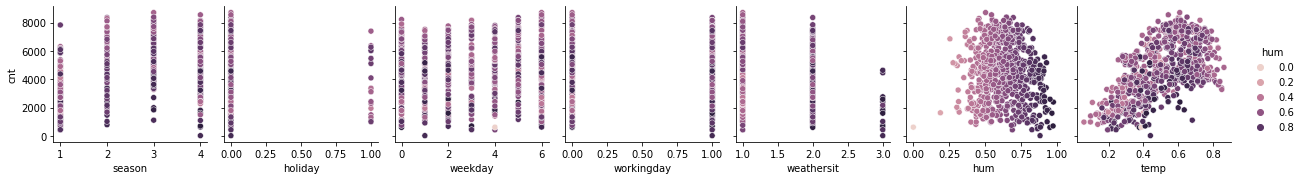

In [8]:
import seaborn as sns

sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors)  

sns.pairplot(
    bike_data,
    x_vars = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'hum', 'temp'],
    y_vars = ['cnt'],
    diag_kind = 'kde',
    hue = 'hum'
)

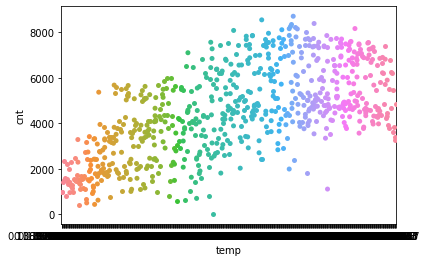

In [9]:
sns.stripplot(y='cnt', x='temp', data=bike_data, hue=None)

In [10]:
univar_data = bike_data[['temp', 'cnt']]
univar_data.head()

,temp,cnt
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600


In [11]:
trainData = univar_data.sample(frac = 0.8, random_state = 0)
testData = univar_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('cnt')
testLabels = testFeatures.pop('cnt')

In [12]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
         temp   cnt
196  0.686667  5923
187  0.750000  4592
14   0.233333  1248
31   0.192174  1360
390  0.341667  4075
Test Data : 
        temp   cnt
9   0.150833  1321
11  0.172727  1162
19  0.261667  1927
23  0.097391  1416
28  0.196522  1098
Train Data Featues : 
         temp
196  0.686667
187  0.750000
14   0.233333
31   0.192174
390  0.341667
Test Data Features : 
        temp
9   0.150833
11  0.172727
19  0.261667
23  0.097391
28  0.196522
Train Data Labels : 
196    5923
187    4592
14     1248
31     1360
390    4075
Name: cnt, dtype: int64
Test Data Labels : 
9     1321
11    1162
19    1927
23    1416
28    1098
Name: cnt, dtype: int64


In [13]:
#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])


In [29]:
model.compile(
              loss='mean_absolute_error',
              optimizer = tf.keras.optimizers.SGD(0.99),
              metrics = ['mae', 'mse'])

In [30]:
numOfEpochs = 300

#now we created the history variable in order for us to plot graphs in the later phase .. follow on you'll understand
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Epoch 1/300
19/19 [==============================] - 0s 8ms/step - loss: 1260.2758 - mae: 1260.2758 - mse: 2346577.5000 - val_loss: 1190.7782 - val_mae: 1190.7782 - val_mse: 2036497.1250
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 1260.2747 - mae: 1260.2747 - mse: 2346542.2500 - val_loss: 1190.7737 - val_mae: 1190.7737 - val_mse: 2036512.5000
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 1260.2725 - mae: 1260.2725 - mse: 2346693.2500 - val_loss: 1190.7759 - val_mae: 1190.7759 - val_mse: 2036497.5000
Epoch 4/300
19/19 [==============================] - 0s 2ms/step - loss: 1260.2737 - mae: 1260.2737 - mse: 2346560.0000 - val_loss: 1190.7805 - val_mae: 1190.7805 - val_mse: 2036475.0000
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 1260.2649 - mae: 1260.2649 - mse: 2346546.7500 - val_loss: 1190.7712 - val_mae: 1190.7712 - val_mse: 2036510.2500
Epoch 6/300
19/19 [==============================] - 0s 4ms/step 

##Try 2

In [ ]:
#splitting data into trainig and testing (80 - 20) split

trainData = bike_data.sample(frac = 0.8, random_state = 0)
testData = bike_data.drop(trainData.index)
print(f"Train Data : \n{trainData.head(2)}")
print(f"Test Data : \n{testData.head(2)}")

trainLabels = trainData.pop('cnt')
testLabels = testData.pop('cnt')
print("=================================")
print(f"Train labels : \n{trainLabels.head(2)}")
print(f"Test labels : \n{testLabels.head(2)}")
print("===================================")
print(f"Train Data : \n{trainData.head(2)}")
print(f"Test Data : \n{testData.head(2)}")

Train Data : 
     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
196      197  2011-07-16       3   0  ...   0.208342    2418        3505  5923
187      188  2011-07-07       3   0  ...   0.159200     754        3838  4592

[2 rows x 16 columns]
Test Data : 
    instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
9        10  2011-01-10       1   0  ...   0.223267      41        1280  1321
11       12  2011-01-12       1   0  ...   0.304627      25        1137  1162

[2 rows x 16 columns]
Train labels : 
196    5923
187    4592
Name: cnt, dtype: int64
Test labels : 
9     1321
11    1162
Name: cnt, dtype: int64
Train Data : 
     instant      dteday  season  yr  ...      hum  windspeed  casual  registered
196      197  2011-07-16       3   0  ...  0.58500   0.208342    2418        3505
187      188  2011-07-07       3   0  ...  0.65125   0.159200     754        3838

[2 rows x 15 columns]
Test Data : 
    instant      dteday  season  yr

**We want to predict the effect of following conditions on the bike rented numbers one by one:**
```

a. temp

b. weather (not decided)

c. atemp

d. weekday (not decided)

e. humidity

f. season (not decided)

```

In [ ]:
#a. holiday

trainFeaturesTemp = trainData.pop('temp')
testFeaturesTemp = testData.pop('temp')

print(f'Train Features for Temperature : \n{trainFeaturesTemp.head(2)}')
print(f'Test Features for Temperature : \n{testFeaturesTemp.head(2)}')
print("==================================================================")
print(f"Train labels : \n{trainLabels.head(2)}")
print(f"Test labels : \n{testLabels.head(2)}")


Train Features for Temperature : 
196    0.686667
187    0.750000
Name: temp, dtype: float64
Test Features for Temperature : 
9     0.150833
11    0.172727
Name: temp, dtype: float64
Train labels : 
196    5923
187    4592
Name: cnt, dtype: int64
Test labels : 
9     1321
11    1162
Name: cnt, dtype: int64


In [ ]:
#model creation
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [ ]:
#model compilation
model.compile(
    optimizer = 'adam',
    loss = 'mean_absolute_error',
    metrics = ['mse', 'mae']
)

In [ ]:
numEpochs = 5000

history = model.fit(
                    x = trainFeaturesTemp, 
                    y = trainLabels, 
                    validation_data = (testFeaturesTemp, testLabels),
                    epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
19/19 [==============================] - 0s 3ms/step - loss: 4390.8237 - mse: 23071198.0000 - mae: 4390.8237 - val_loss: 4323.5190 - val_mse: 22061298.0000 - val_mae: 4323.5190
Epoch 2502/5000
19/19 [==============================] - 0s 3ms/step - loss: 4390.7959 - mse: 23070938.0000 - mae: 4390.7959 - val_loss: 4323.4907 - val_mse: 22061044.0000 - val_mae: 4323.4907
Epoch 2503/5000
19/19 [==============================] - 0s 2ms/step - loss: 4390.7676 - mse: 23070680.0000 - mae: 4390.7676 - val_loss: 4323.4629 - val_mse: 22060792.0000 - val_mae: 4323.4629
Epoch 2504/5000
19/19 [==============================] - 0s 2ms/step - loss: 4390.7393 - mse: 23070426.0000 - mae: 4390.7393 - val_loss: 4323.4346 - val_mse: 22060538.0000 - val_mae: 4323.4346
Epoch 2505/5000
19/19 [==============================] - 0s 4ms/step - loss: 4390.7104 - mse: 23070174.0000 - mae: 4390.7104 - val_loss: 4323.4058 - val_mse: 22060286.0000 - val

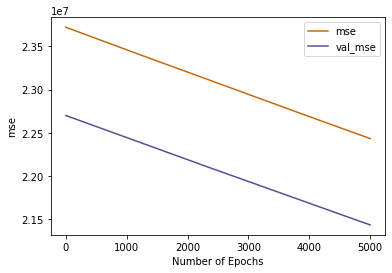

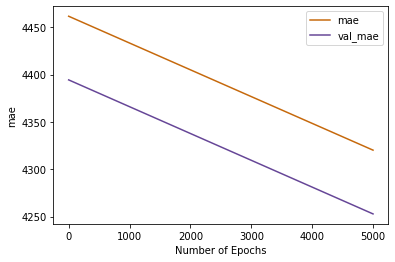

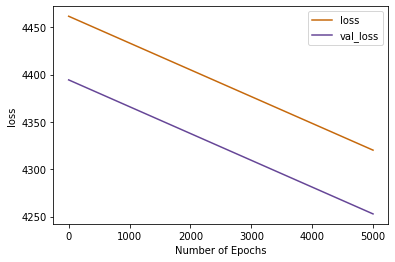

In [ ]:
import matplotlib.pyplot as plt

def plotGraphs(subject):
    plt.plot(history.history[subject])
    plt.plot(history.history[f'val_{subject}'])
    plt.xlabel('Number of Epochs')
    plt.ylabel(subject)
    plt.legend([subject, f'val_{subject}'])
    plt.show()

plotGraphs('mse')
plotGraphs('mae')
plotGraphs('loss')

In [ ]:
print(model.predict([0.2]))

[[159.28049]]


#Multivatiate

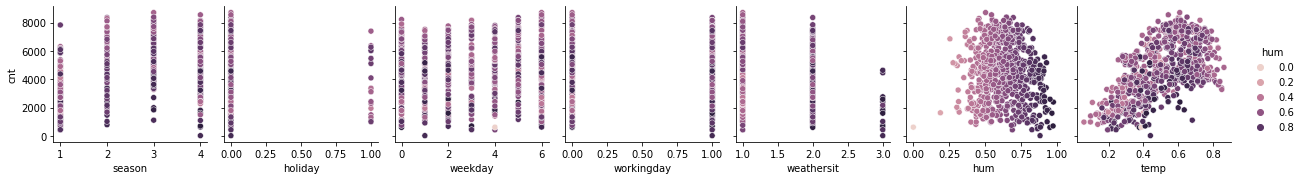

In [31]:
sns.pairplot(
    bike_data,
    x_vars = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'hum', 'temp'],
    y_vars = ['cnt'],
    diag_kind = 'kde',
    hue = 'hum'
)

In [32]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [74]:
multi_data = bike_data[['holiday', 'weathersit', 'hum', 'temp', 'cnt']]
multi_data.head()

,holiday,weathersit,hum,temp,cnt
0,0,2,0.805833,0.344167,985
1,0,2,0.696087,0.363478,801
2,0,1,0.437273,0.196364,1349
3,0,1,0.590435,0.200000,1562
4,0,1,0.436957,0.226957,1600


In [75]:
trainData = multi_data.sample(frac=0.8, random_state=0)
testData = multi_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('cnt')
testLabels = testFeatures.pop('cnt')

In [76]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
     holiday  weathersit       hum      temp   cnt
196        0           1  0.585000  0.686667  5923
187        0           1  0.651250  0.750000  4592
14         0           2  0.498750  0.233333  1248
31         0           2  0.829565  0.192174  1360
390        0           2  0.769583  0.341667  4075
Test Data : 
    holiday  weathersit       hum      temp   cnt
9         0           1  0.482917  0.150833  1321
11        0           1  0.599545  0.172727  1162
19        0           2  0.538333  0.261667  1927
23        0           1  0.491739  0.097391  1416
28        0           1  0.651739  0.196522  1098
Train Data Featues : 
     holiday  weathersit       hum      temp
196        0           1  0.585000  0.686667
187        0           1  0.651250  0.750000
14         0           2  0.498750  0.233333
31         0           2  0.829565  0.192174
390        0           2  0.769583  0.341667
Test Data Features : 
    holiday  weathersit       hum      temp
9        

In [92]:
norm_trainFeatures = trainFeatures[['holiday', 'weathersit']]

# apply normalization techniques
for column in norm_trainFeatures.columns:
    norm_trainFeatures[column] = (norm_trainFeatures[column] - norm_trainFeatures[column].min()) / (norm_trainFeatures[column].max() - norm_trainFeatures[column].min())    
  
# view normalized data
trainFeatures2 = trainFeatures.copy()
trainFeatures2[['holiday', 'weathersit']] = norm_trainFeatures
print(trainFeatures2.head())


     holiday  weathersit       hum      temp
196      0.0         0.0  0.585000  0.686667
187      0.0         0.0  0.651250  0.750000
14       0.0         0.5  0.498750  0.233333
31       0.0         0.5  0.829565  0.192174
390      0.0         0.5  0.769583  0.341667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [93]:
norm_testFeatures = testFeatures[['holiday', 'weathersit']]

# apply normalization techniques
for column in norm_testFeatures.columns:
    norm_testFeatures[column] = (norm_testFeatures[column] - norm_testFeatures[column].min()) / (norm_testFeatures[column].max() - norm_testFeatures[column].min())    
  
# view normalized data
testFeatures2 = testFeatures.copy()
testFeatures2[['holiday', 'weathersit']] = norm_testFeatures
print(testFeatures2.head())

    holiday  weathersit       hum      temp
9       0.0         0.0  0.482917  0.150833
11      0.0         0.0  0.599545  0.172727
19      0.0         0.5  0.538333  0.261667
23      0.0         0.0  0.491739  0.097391
28      0.0         0.0  0.651739  0.196522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [94]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil( (2 * numFeatures) / 3 )
print(inputNeurons)

3


In [95]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(units=2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [96]:
model.compile(
              loss='mean_absolute_error',
              optimizer = tf.keras.optimizers.Adam(0.1),
              metrics = ['mae', 'mse'])

In [97]:
numOfEpochs = 400

history = model.fit(x = trainFeatures2, y = trainLabels, validation_data = (testFeatures2, testLabels), epochs = numOfEpochs)

Epoch 1/400
19/19 [==============================] - 1s 10ms/step - loss: 4487.8340 - mae: 4487.8340 - mse: 23974204.0000 - val_loss: 4288.3252 - val_mae: 4288.3252 - val_mse: 21788176.0000
Epoch 2/400
19/19 [==============================] - 0s 2ms/step - loss: 3805.0540 - mae: 3805.0540 - mse: 18457462.0000 - val_loss: 2511.4373 - val_mae: 2511.4373 - val_mse: 9182912.0000
Epoch 3/400
19/19 [==============================] - 0s 2ms/step - loss: 1902.4354 - mae: 1902.4354 - mse: 5549604.0000 - val_loss: 1649.8354 - val_mae: 1649.8354 - val_mse: 3997025.2500
Epoch 4/400
19/19 [==============================] - 0s 2ms/step - loss: 1596.1219 - mae: 1596.1219 - mse: 3917847.7500 - val_loss: 1426.5698 - val_mae: 1426.5698 - val_mse: 3015510.7500
Epoch 5/400
19/19 [==============================] - 0s 3ms/step - loss: 1483.8629 - mae: 1483.8629 - mse: 3326614.0000 - val_loss: 1352.2363 - val_mae: 1352.2363 - val_mse: 2731573.5000
Epoch 6/400
19/19 [==============================] - 0s 3ms/s